# Sentiment Analysis for Financial Decision Making
 **Nandini Gantayat , Cyril Kancel , Sandesh Nagarur**
 
 # Fundamentals of NLP: course project 2023

**Prof. Dr. Matthijs Meire  
Ieseg school of management**


# Libraries

In [410]:
#__Data manipulation__
import pandas as pd
import numpy as np
import re
import string 

#language preprocessing tools
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from rake_nltk import Rake
import gensim
from gensim import corpora
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.phrases import Phrases, Phraser
import spacy
from collections import Counter
from textblob import TextBlob
from textblob import Word

#Visualizations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import squarify
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import networkx as nx 

#neural net model
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout2D, LSTM
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#user interactivity
import ipywidgets as widgets
from IPython.display import display

#suppressing unneccessary warnings
import warnings
warnings.filterwarnings("ignore")

In [342]:
#Not inbuilt might need seperate installation
#!pip install pyLDAvis
#!pip install rake_nltk
#!pip install squarify
#pip install glove_python
#nltk.download('omw-1.4')

# Reading data

In [343]:
df=pd.read_csv("C:/Users/ngantayat1/Downloads/archive (6)/all-data.csv",encoding='iso-8859-1',delimiter=",",header=None)

In [344]:
df

,0,1
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4842,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4843,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4844,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [345]:
# add header 
df.columns = ['Labels', 'Financial_Phrases']
df

,Labels,Financial_Phrases
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4842,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4843,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4844,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [346]:
pd.options.display.max_colwidth = None

# Display the full content to analyse the nature of text
print(df1['Financial_Phrases'])

0                                                                                                                      [according, gran, company, plans, move, production, russia, although, company, growing]
1                                      [technopolis, plans, develop, stages, area, less, 100000, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]
2       [international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]
3                          [new, production, plant, company, would, increase, capacity, meet, expected, increase, demand, would, improve, use, raw, materials, therefore, increase, production, profitability]
4                                       [according, company, updated, strategy, years, 20092012, basware, targets, longterm, net, sales, growth, range, 20, 40, operating, p

In [347]:
# checking if Financial Phrase column contains HTML tags or URLs

has_html_tags = df['Financial_Phrases'].apply(lambda x: bool(re.search(r'<.*?>', x)))
has_urls = df['Financial_Phrases'].apply(lambda x: bool(re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))

print('Financial Phrase column contains HTML tags:', has_html_tags.any())
print('Financial Phrase column contains URLs:', has_urls.any())

Financial Phrase column contains HTML tags: False
Financial Phrase column contains URLs: False


# Polarity and Subjectivity analysis of the phrases

In [348]:
df1 = df.copy()


In [349]:
# calculate polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# calculate subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Calculating polarity and subjectivity for each phrase
df1['Polarity'] = df1['Financial_Phrases'].apply(getPolarity)
df1['Subjectivity'] = df1['Financial_Phrases'].apply(getSubjectivity)
df1

,Labels,Financial_Phrases,Polarity,Subjectivity
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",0.000000,0.000000
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",0.083333,0.066667
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",0.000000,0.166667
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,-0.064802,0.438695
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",0.000000,0.000000
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,-0.500000,0.300000
4842,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",0.000000,0.000000
4843,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",0.000000,0.000000
4844,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",0.040000,0.330000


<Figure size 432x720 with 0 Axes>

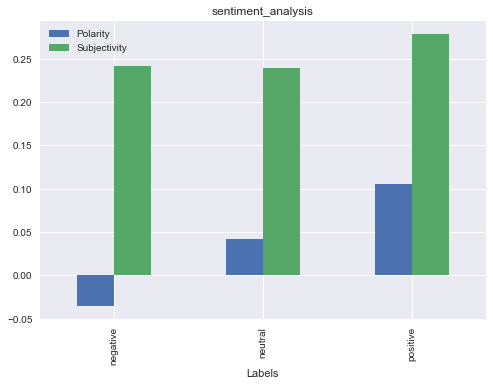

In [350]:
#plot the polarity and subjectivity for each sentiment label

plt.style.use('seaborn')
df_SA=df1.groupby('Labels').mean()
plt.figure(figsize=(6,10))
df_SA.plot(kind='bar')
plt.title('sentiment_analysis')
plt.show()

# Text cleaning

In [351]:
def clean_phrases(df):
    # make text lowercase
    df1['Financial_Phrases'] = df1['Financial_Phrases'].apply(lambda s: str(s).lower())
    
    # remove special characters except % and all punctuation marks
    df1['Financial_Phrases'] = df1['Financial_Phrases'].apply(lambda s: re.sub(r'[^a-zA-Z0-9%\s]+|[^\w\s]', '', s))
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    df1['Financial_Phrases'] = df1['Financial_Phrases'].apply(lambda s: ' '.join([word for word in word_tokenize(s) if word not in stop_words]))
    
    # tokenize
    df1['Financial_Phrases'] = df1['Financial_Phrases'].apply(lambda s: word_tokenize(s))
    
    return df

clean_phrases(df1)

,Labels,Financial_Phrases,Polarity,Subjectivity
0,neutral,"[according, gran, company, plans, move, production, russia, although, company, growing]",0.000000,0.000000
1,neutral,"[technopolis, plans, develop, stages, area, less, 100000, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]",0.083333,0.066667
2,negative,"[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]",0.000000,0.166667
3,positive,"[new, production, plant, company, would, increase, capacity, meet, expected, increase, demand, would, improve, use, raw, materials, therefore, increase, production, profitability]",-0.064802,0.438695
4,positive,"[according, company, updated, strategy, years, 20092012, basware, targets, longterm, net, sales, growth, range, 20, 40, operating, profit, margin, 10, 20, net, sales]",0.000000,0.000000
...,...,...,...,...
4841,negative,"[london, marketwatch, share, prices, ended, lower, london, monday, rebound, bank, stocks, failed, offset, broader, weakness, ftse, 100]",-0.500000,0.300000
4842,neutral,"[rinkuskiai, beer, sales, fell, 65, per, cent, 416, million, litres, kauno, alus, beer, sales, jumped, 69, per, cent, 248, million, litres]",0.000000,0.000000
4843,negative,"[operating, profit, fell, eur, 354, mn, eur, 688, mn, 2007, including, vessel, sales, gain, eur, 123, mn]",0.000000,0.000000
4844,negative,"[net, sales, paper, segment, decreased, eur, 2216, mn, second, quarter, 2009, eur, 2411, mn, second, quarter, 2008, operating, profit, excluding, nonrecurring, items, rose, eur, 80, mn, eur, 76, mn]",0.040000,0.330000


# WORDCLOUDS

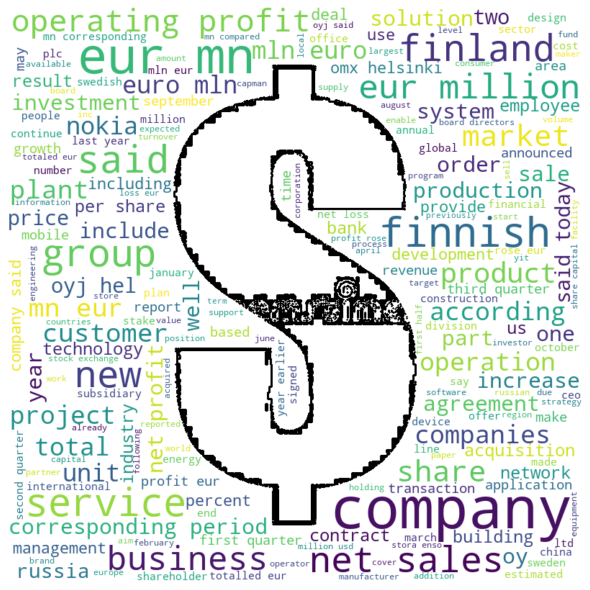

In [352]:
#wordcloud needs string object
Phrases = ' '.join(df1['Financial_Phrases'].sum())
mask = np.array(Image.open("C:/Users/ngantayat1/Downloads/dollar1.png"))
        
# plot wordcloud 
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color='white',
                      contour_width=3,
                      contour_color='black',
                      mask=mask)

wordcloud.generate(Phrases)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

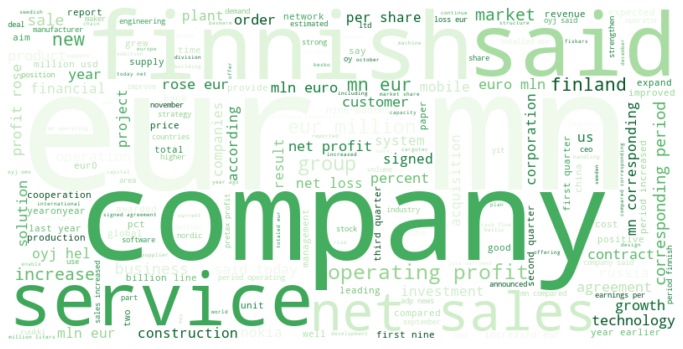

In [353]:
# positive sentiment
positive_phrases = df1[df1['Labels'] == 'positive']['Financial_Phrases'].values

positive_text =  ' '.join(positive_phrases.sum())

# plot WordCloud 
wordcloud = WordCloud(background_color='white', colormap='Greens', width=800, height=400)

wordcloud.generate(positive_text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

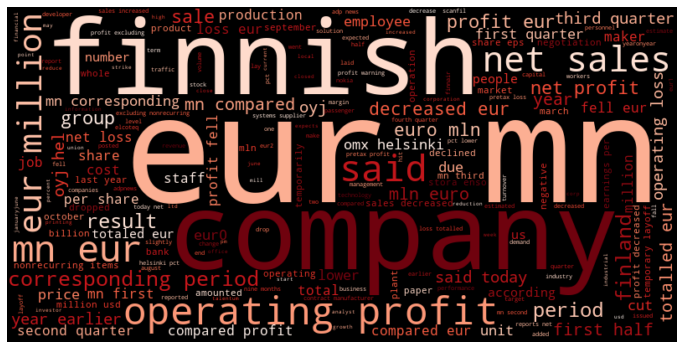

In [354]:
# negative sentiment
negative_phrases = df1[df1['Labels'] == 'negative']['Financial_Phrases'].values

positive_text =  ' '.join(negative_phrases.sum())

# plot WordCloud
wordcloud = WordCloud(background_color='black', colormap='Reds', width=800, height=400)

wordcloud.generate(positive_text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

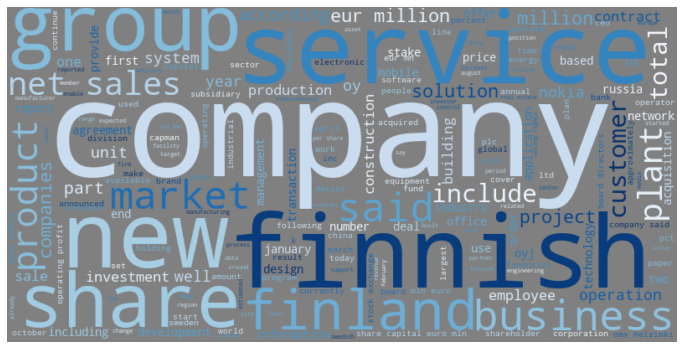

In [355]:
#neutral sentiment
neutral_phrases = df1[df1['Labels'] == 'neutral']['Financial_Phrases'].values
positive_text =  ' '.join(neutral_phrases.sum())

# plot WordCloud 
wordcloud = WordCloud(background_color='grey', colormap='Blues', width=800, height=400)

wordcloud.generate(positive_text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# BI grams analysis

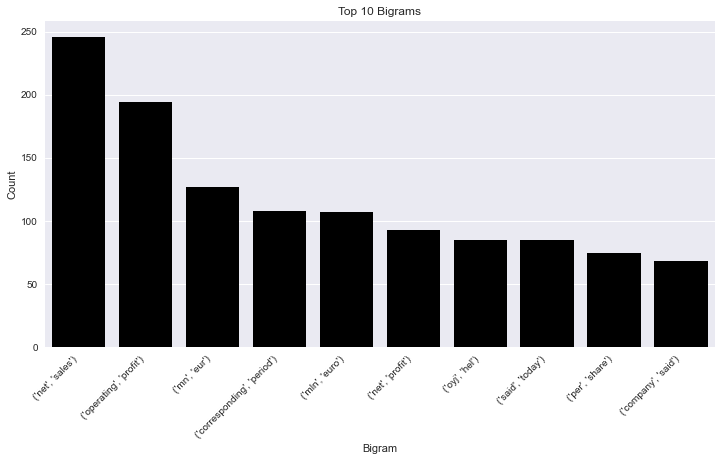

In [356]:
# bigrams and their frequency
bigram_freq = pd.Series(ngrams(df1['Financial_Phrases'].sum(), 2)).value_counts().reset_index()
bigram_freq.columns = ['ngram', 'count']

# plot the top 10 bigrams 
plt.figure(figsize=(12, 6))
sns.barplot(x='ngram', y='count', data=bigram_freq.head(10), color='black')
plt.title('Top 10 Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [357]:
colors = ['grey', 'green', 'red']

fig = go.Figure(data=[go.Bar(x=df1['Labels'].value_counts().index, y=df1['Labels'].value_counts().values, 
                             marker_color=colors)])

# Annotating each bar with its count
for i, v in enumerate(df1['Labels'].value_counts().values):
    fig.add_annotation(x=i, y=v+50, text=str(v), showarrow=False)

# Update the layout of the figure
fig.update_layout(title="Number of observations for each sentiment", xaxis_title="Sentiment Labels", yaxis_title="Number of observation")

# Display the plot
pio.show(fig)

In [358]:
# Filter rows based on the labels
pos_df = df1[df1['Labels'] == 'positive']
neg_df = df1[df1['Labels'] == 'negative']
neu_df = df1[df1['Labels'] == 'neutral']

# Sort the dataframes based on polarity scores
pos_sorted = pos_df.sort_values(by='Polarity', ascending=False).head(10)
neg_sorted = neg_df.sort_values(by='Polarity', ascending=True).head(10)
neu_sorted = neu_df.sort_values(by='Polarity', ascending=False).head(10)

# Concatenate the dataframes and create a new one
top_phrases_df = pd.concat([pos_sorted, neg_sorted, neu_sorted])

In [359]:
# extract column 'Financial_Phrases' and rename it
top_10_pos = pos_sorted[['Financial_Phrases']].rename(columns={'Financial_Phrases': 'Positive'})
top_10_neg = neg_sorted[['Financial_Phrases']].rename(columns={'Financial_Phrases': 'Negative'})
top_10_neu = neu_sorted[['Financial_Phrases']].rename(columns={'Financial_Phrases': 'Neutral'})

# Create a rank variable
top_10_pos['rank'] = range(1, 11)
top_10_neg['rank'] = range(1, 11)
top_10_neu['rank'] = range(1, 11)

# merge the three dataframes on the 'rank' column
top_10 = pd.merge(top_10_pos, top_10_neg, on='rank', how='outer')
top_10 = pd.merge(top_10, top_10_neu, on='rank', how='outer')
top_10

,Positive,rank,Negative,Neutral
0,"[terms, profitability, earnings, 2007, best, year, history, chief, executive, velimatti, mattila, said]",1,"[growth, rate, paying, national, debt, extremely, painful]","[cant, understand, theyre, saying, impressive, watch, hit, ball, speeds]"
1,"[pilot, project, proved, rifd, technology, ideal, purposes, comments, olli, saarinen, material, handling, supervisor, yara]",2,"[bad, news, barbeque, season]",[welcome]
2,"[ceo, erkki, jrvinen, happy, company, performance, 2010]",3,"[disappointment, see, plan, folded]","[warmly, welcome]"
3,"[happy, working, rapala, encourage, boaters, anglers, introduce, newcomers, sport, said, rbff, president, ceo, frank, peterson]",4,"[finnish, suominen, flexible, packaging, cutting, 48, jobs, unit, tampere, two, nastola, finland]",[welcome]
4,"[warmly, welcome, satama, states, jussi, lansio, chairman, board]",5,"[london, marketwatch, share, prices, ended, lower, london, monday, rebound, bank, stocks, failed, offset, broader, weakness, ftse, 100]","[successful, requires, providing, level, quality, satisfies, customers, partners]"
5,"[win, oems, targeting, develop, wimax, products]",6,"[ruukki, group, calculates, lost, eur, 4mn, failed, project]","[today, orange, scissors, iconic, symbol, excellent, ergonomic, design, superior, quality, associated, every, product, fiskars]"
6,"[chf, great, product]",7,"[capital, expenditure, energy, efficiency, unfortunately, fallen, along, decline, economy]","[finland, corresponding, service, alma, media, etuovicom, finland, popular, best, known, nationwide, online, service, home, property, sales]"
7,"[warmly, welcome, michael, frei, outotec]",8,"[market, share, decreased, route, helsinki, finland, tallinn, estonia, 01, percentage, points, 248]","[includes, eur, 395, mn, change, fair, value, investment, properties]"
8,"[competition, received, great, enthusiasm, employees, goes]",9,"[consolidated, pretax, profit, decreased, 692, eur, 410, mn, eur, 1331, mn, 2007]","[figure, includes, change, fair, value, property, portfolio, eur, 262, million]"
9,"[happy, outcome, sneed, said, hearing]",10,"[adp, news, jan, 22, 2009, finnish, mobile, phones, maker, nokia, oyj, omx, nok1v, said, today, operating, profit, decreased, eur, 5, billion, usd, 65, bn, 2008, eur, 8, billion, 2007]","[fair, value, investment, properties, eur, 2, 2510, 1, 2814, million]"


In [360]:
negative_corpus = df.loc[df['Labels'] == 'negative', ['Financial_Phrases', 'Labels']]
positive_corpus = df.loc[df['Labels'] == 'positive', ['Financial_Phrases', 'Labels']]
neutral_corpus = df.loc[df['Labels'] == 'neutral', ['Financial_Phrases', 'Labels']]

In [361]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define a function to tokenize a sentence
def tokenize_sentence(sentence):
    doc = nlp(sentence)
    return [token.text for token in doc]

# Define a function to extract top keywords for a dataframe
def extract_top_keywords(df):
    # Tokenize the 'Financial_Phrases' column
    df['tokens'] = df['Financial_Phrases'].apply(tokenize_sentence)

    # Extract top keywords using RAKE for each sentence
    r = Rake()
    top_keywords = []
    for tokens in df['tokens']:
        r.extract_keywords_from_text(' '.join(tokens))
        top_keywords.extend(r.get_ranked_phrases_with_scores())

    # Extract individual keywords from ranked phrases
    keywords = []
    for score, phrase in top_keywords:
        keywords.extend(phrase.split())

    # Get the top 10 keywords overall
    top_keywords = sorted(set(keywords), key=keywords.count, reverse=True)[:10]
    return top_keywords

# Extract top keywords for each corpus
positive_top_keywords = extract_top_keywords(positive_corpus)
negative_top_keywords = extract_top_keywords(negative_corpus)
neutral_top_keywords = extract_top_keywords(neutral_corpus)

# Print the top keywords for each corpus
print('Top keywords for positive corpus:', positive_top_keywords)
print('Top keywords for negative corpus:', negative_top_keywords)
print('Top keywords for neutral corpus:', neutral_top_keywords)

Top keywords for positive corpus: ['eur', 'company', 'mn', 'said', 'year', 'finnish', 'net', 'sales', 'profit', '1']
Top keywords for negative corpus: ['eur', 'mn', 'profit', '1', 'net', 'finnish', 'company', 'year', '3', '2']
Top keywords for neutral corpus: ['company', 'eur', 'said', 'finland', 'finnish', 'business', 'million', 'group', 'new', '1']


# Semantic orientations
Semantic orientations refer to the attitudes, opinions, or evaluations expressed towards a particular concept in a text

Two orientation found in this data are:-  
**Ambivalent orientations**-Expressing both positive and negative attitudes towards a concept. In this data a phrase containing both profit and loss could be an example of this orientation.

**Ironic orientations**-Expressing a meaning that is opposite to the literal or expected meaning.

The phrases with such orientation do not provide any optimal insights.

In [362]:
pattern = r'\bprofit.*loss|loss.*profit\b'

financial_phrases = df1['Financial_Phrases'].tolist()
ambivalent_phrase = []
for phrase in financial_phrases:
    phrase_str = " ".join(phrase)
    if re.search(pattern, phrase_str, flags=re.IGNORECASE):
        ambivalent_phrase.append(phrase_str)
        
ambivalent_phrase

['last quarter 2010 componenta net sales doubled eur131m eur76m period year earlier moved zero pretax profit pretax loss eur7m',
 'consolidated net sales increased 16 reach eur74 8 operating profit amounted eur0 9 compared loss eur0 7 prior year period',
 '2009 3 february 2010 finlandbased steel maker rautaruukki oyj hel rtrks ruukki said today slipped largerthanexpected pretax loss eur46m fourth quarter 2009 yearearlier profit eur45m',
 'company slipped operating loss eur 26 million profit eur 13 million',
 '23 april 2010 finnish construction engineering company outotec oyj hel ote1v said today slipped net loss eur7 3 first quarter 2010 net profit eur12 5 corresponding period last year',
 'cramo slipped pretax loss eur 67 million pretax profit eur 589 million',
 'finnish solutions provider affecto oyj hel afe1v said today slipped net loss eur 115000 usd 152000 second quarter 2010 profit eur 845000 corresponding period year earlier',
 '2009 comptel slipped net loss eur2 1 profit eur6 6

In [363]:
pattern = r'\b(ironic|sarcastic|sarcasm|humorous|funny|laugh|ridiculous|unexpected|surprising|contradictory|paradoxical|absurd|mocking)\b'

financial_phrases = df1['Financial_Phrases'].tolist()
ironic_phrases = []
for phrase in financial_phrases:
    phrase_str = " ".join(phrase)
    if re.search(pattern, phrase_str, flags=re.IGNORECASE):
        ironic_phrases.append(phrase_str)

ironic_phrases

['europe paper industry situation paradoxical']

# Named entity recognition (NER)

In [364]:
nlp = spacy.load('en_core_web_sm')

# Join all tokens into a single string
text = ' '.join(df1['Financial_Phrases'].sum())

entity_list = []

# Apply entity extraction
doc = nlp(text)
for ent in doc.ents:
        entity_list.append((ent.text, ent.label_))
        
df_entity = pd.DataFrame(entity_list)
df_entity

,0,1
0,russia,GPE
1,less 100000 square meters,QUANTITY
2,tens,CARDINAL
3,daily,DATE
4,years 20092012,DATE
...,...,...
8555,finland,GPE
8556,105,CARDINAL
8557,january,DATE
8558,finland,GPE


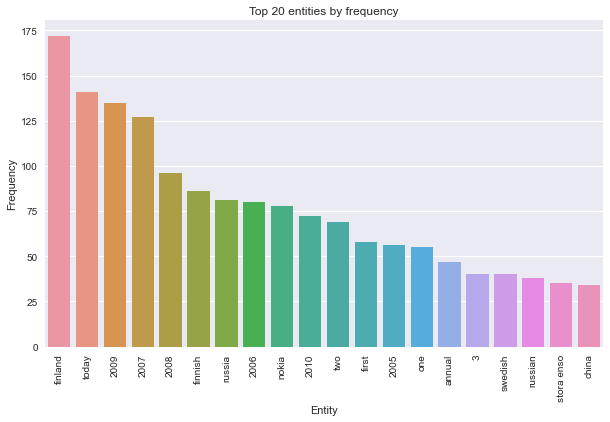

In [365]:
# plot frequency distribution of the entities
freq_dist = Counter([entity[0] for entity in entity_list])

df_freq_dist = pd.DataFrame.from_dict(freq_dist, orient='index', columns=['count'])
df_freq_dist = df_freq_dist.sort_values(by=['count'], ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_freq_dist.index[:20], y=df_freq_dist['count'][:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Entity', ylabel='Frequency', title='Top 20 entities by frequency')
plt.show()

In [366]:
entity_types = set()

for entity, entity_type in entity_list:
    entity_types.add(entity_type)

print("Number of unique entity types:", len(entity_types))
print("Entity types:", entity_types)

Number of unique entity types: 18
Entity types: {'ORG', 'EVENT', 'WORK_OF_ART', 'ORDINAL', 'GPE', 'FAC', 'DATE', 'QUANTITY', 'CARDINAL', 'LAW', 'LOC', 'TIME', 'PRODUCT', 'LANGUAGE', 'NORP', 'PERSON', 'MONEY', 'PERCENT'}


**18 types of unique entities could be recognised from our text**

In [367]:
#most occuring entities
entity_counter = Counter(entity[1] for entity in entity_list)
top_entities = entity_counter.most_common(10)

entity_count_df = pd.DataFrame(top_entities, columns=['Entity', 'Count'])
entity_count_df

,Entity,Count
0,DATE,2619
1,CARDINAL,2614
2,ORG,901
3,GPE,749
4,PERSON,477
5,NORP,352
6,QUANTITY,183
7,ORDINAL,148
8,MONEY,121
9,PERCENT,120


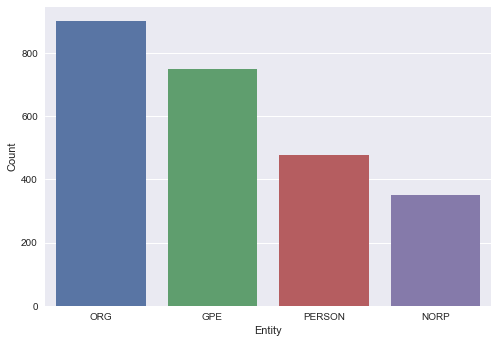

In [368]:
top_entities = ['ORG', 'GPE', 'PERSON', 'NORP']
filtered_df = entity_count_df[entity_count_df['Entity'].isin(top_entities)]
entity_counts = filtered_df['Entity']
Count=entity_count_df['Count']

# Plot the barplot
sns.barplot(x=entity_counts, y=Count)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

In [369]:
# Convert entity_list to set to remove duplicates
entity_set = set(entity_list)
unique_entities = list(entity_set)

df_unique_entities = pd.DataFrame(unique_entities, columns=['entity', 'entity_type'])
df_unique_entities


,entity,entity_type
0,57,CARDINAL
1,kemira group ceo lasse kurkilahti,ORG
2,eur0 12,PRODUCT
3,330 euro,QUANTITY
4,4 eur1,DATE
...,...,...
4274,246367,CARDINAL
4275,finieris,GPE
4276,coming months,DATE
4277,11720829,DATE


**Out of the entities found person, organisation, nationality and geo-political entities will help extract more insights as they occur frequently and support the nature of our problem**

# Analysis of PERSON entity

In [370]:
person_entities = []

for entity in entity_list:
    if entity[1] == 'PERSON':
        person_entities.append(entity[0])
        
df_person = pd.DataFrame(person_entities, columns=['Person_Entity'])
df_person

,Person_Entity
0,eur76m
1,stora enso
2,hobby hall
3,barc
4,hobby hall
...,...
472,gmt nokia
473,kauhava
474,nonwovens
475,stora enso


In [371]:
top_entities = df_person['Person_Entity'].value_counts().head(10)
top_entities.max()
print(top_entities)


stora enso             35
tikkurila               6
nasdaq omx helsinki     6
nonwovens               5
alexandria va           5
kalmar                  4
abp hel fisas           3
lee                     3
hel nembv               3
tiimari hel tii1v       3
Name: Person_Entity, dtype: int64


**Here the extraction is faulty as they are not person yet there are some insights that could be derived from here  
stora enso- is a company in finland  
tikkurila- is a region in finland and kalmar is a city in sweden   
abp hel fisas is a swedish investor firm  
hel nembv is neomarkas B type share and tiimari hel tii1v is a very high price stock listed on nasdaq omx helsinki**

# Analysis of ORG entity

In [372]:

org_entities = []

for entity in entity_list:
    if entity[1] == 'ORG':
        org_entities.append(entity[0])

df_org = pd.DataFrame(org_entities, columns=['ORG_Entity'])
df_org


,ORG_Entity
0,componenta
1,boston cfsb
2,eur0
3,nokia
4,pvt ltd subsidiary
...,...
896,elcoteq group
897,eur3m eur4
898,nokia inc nyse
899,nokia


In [373]:
top_entities_org = df_org['ORG_Entity'].value_counts().head(10)
top_entities_org.max()
print(top_entities_org)

nokia               76
eur0                20
microsoft            8
matti                6
metso                6
cramo                6
componenta           5
siemens networks     5
comptel              5
samsung              5
Name: ORG_Entity, dtype: int64


# Analysis of GPE entity

In [374]:

GPE_entities = []

for entity in entity_list:
    if entity[1] == 'GPE':
        GPE_entities.append(entity[0])

df_GPE = pd.DataFrame(GPE_entities, columns=['GPE_Entity'])
df_GPE

,GPE_Entity
0,russia
1,finland
2,russia
3,finland
4,russia
...,...
744,finland
745,london
746,london
747,finland


In [375]:
top_entities = df_GPE['GPE_Entity'].value_counts()
top_entities.max()
top_entities = df_GPE['GPE_Entity'].value_counts().rename_axis('country').reset_index(name='GPE_Entity')
top_gpe_df = top_entities.head(5)

top_gpe_df.head(5)

,country,GPE_Entity
0,finland,172
1,russia,81
2,china,34
3,estonia,24
4,india,21


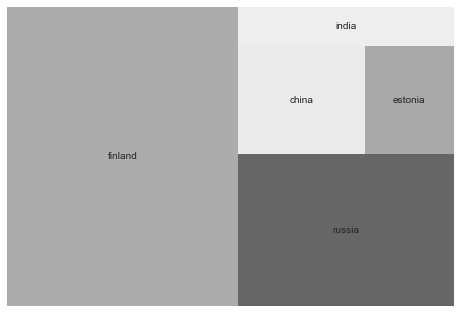

In [376]:

squarify.plot(sizes=top_gpe_df['GPE_Entity'], label=top_gpe_df['country'], alpha=.6)
plt.axis('off')
plt.show()

# Analysis of NORP entity

In [377]:

person_entities = []

for entity in entity_list:
    if entity[1] == 'NORP':
        person_entities.append(entity[0])
        
df_NORP = pd.DataFrame(person_entities, columns=['NORP_Entity'])
df_NORP

,NORP_Entity
0,russian
1,brazilian
2,finnish
3,finnish
4,russian
...,...
347,russian
348,european
349,skandinavian
350,scandinavian


In [378]:
top_entities = df_NORP['NORP_Entity'].value_counts()
top_entities.max()
top_entities = df_NORP['NORP_Entity'].value_counts().rename_axis('nationality').reset_index(name='NORP_Entity')
top_norp_df = top_entities.head(5)

top_norp_df.head(5)


,nationality,NORP_Entity
0,finnish,86
1,swedish,40
2,russian,38
3,european,24
4,indian,15


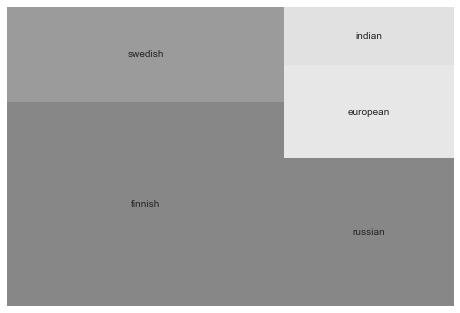

In [379]:
squarify.plot(sizes=top_norp_df['NORP_Entity'], label=top_norp_df['nationality'], alpha=.5)
plt.axis('off')
plt.show()

In [380]:
import gensim
from gensim import corpora

# Define your list of stopwords
my_stopwords = ["company", "euro", "finland","finnish","said","shares","today","also","market","net","profit","sales","eur"]

dictionary = corpora.Dictionary(df1['Financial_Phrases'])

# Remove stopwords from dictionary
stopword_ids = [dictionary.token2id[word] for word in my_stopwords if word in dictionary.token2id]
dictionary.filter_tokens(stopword_ids)
dictionary.compactify()

#list of stopwords
stopword_ids = [dictionary.token2id[word] for word in my_stopwords if word in dictionary.token2id]
stopword_map = {id: word for word, id in dictionary.token2id.items() if id in stopword_ids}
dictionary.filter_tokens(stopword_ids)
dictionary.compactify()
dictionary.stopwords = stopword_map.values()

#  document-term matrix
corpus = [dictionary.doc2bow(text) for text in (df1['Financial_Phrases'])]

# LDA model
num_topics = 3
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

# Print
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.007*"million" + 0.006*"oyj" + 0.005*"capital" + 0.005*"total" + 0.004*"2010"')
(1, '0.007*"business" + 0.007*"new" + 0.007*"services" + 0.005*"mobile" + 0.004*"production"')
(2, '0.031*"mn" + 0.017*"operating" + 0.014*"period" + 0.013*"2008" + 0.013*"mln"')


# Topic modelling using LDA

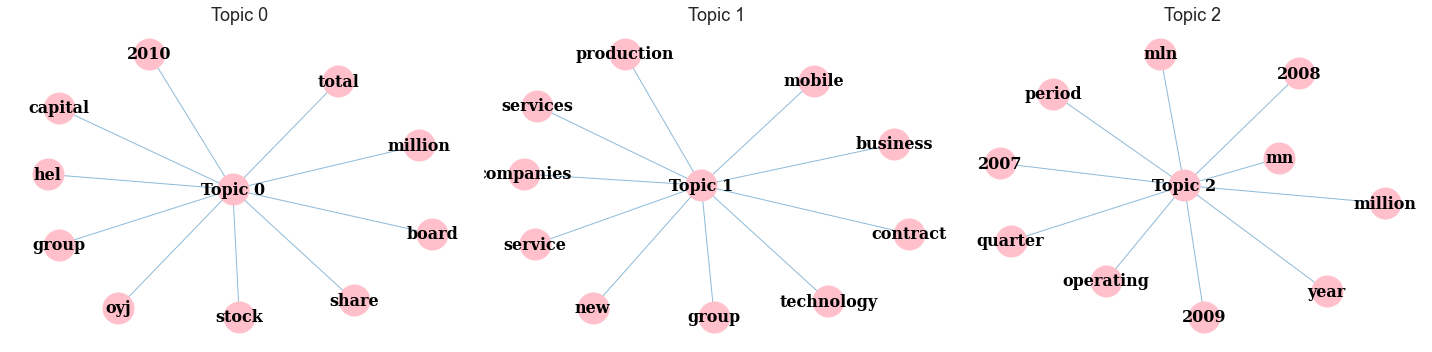

In [381]:


fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, row in enumerate(lda_model.show_topics()):
    G = nx.Graph()
    topic_num = row[0]
    topic_weight = row[1]
    topic_terms = row[1].split('+')
    for term in topic_terms:
        term = term.strip()
        term_weight = float(term.split('*')[0])
        term_name = term.split('*')[1].replace('"', '')
        G.add_edge('Topic {}'.format(topic_num), term_name, weight=term_weight)

    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='#ffc0cb', ax=axs[i])
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='#1f78b4', ax=axs[i])
    nx.draw_networkx_labels(G, pos, font_size=16, font_family='serif', font_weight='bold', ax=axs[i])
    
    axs[i].axis('off')
    axs[i].set_title('Topic {}'.format(topic_num), fontsize=18)

plt.tight_layout()
plt.show()


In [382]:
# Visualize topic network with pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

# Word embeddings in 2d plane with tsne

In [383]:
from langdetect import detect_langs

df2 = df.copy()
languages = []

# Loop over the sentences in the list and detect their language
for sentence in df2["Financial_Phrases"]:
    languages.append(detect_langs(sentence))
    
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
df2['language'] = languages
#print('The detected languages are: ', languages)

phrases = df2[df2['language'] == "en"]

In [384]:
wpt = nltk.WordPunctTokenizer() 
stop_words = nltk.corpus.stopwords.words('english') # initialize the stop word list

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)  # re.I ignores cases, re.A matches only ASCII characters)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [385]:
norm_phrases = normalize_corpus(df2["Financial_Phrases"])

print('Total lines:', len(df2))
print('\nSample line:', df2.iloc[10,2])
print('\nProcessed line:', norm_phrases[10])

Total lines: 4846

Sample line: en

Processed line: teliasonera tlsn said offer line strategy increase ownership core business holdings would strengthen eesti telekom offering customers


In [386]:
# tokenize sentences in corpus
tokenized_phrases = [wpt.tokenize(document) for document in norm_phrases]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 3          # Context window size                                                                                    
min_word_count = 1   # Minimum word count in the entire dataset                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_phrases, vector_size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, epochs=50)

In [387]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['technology','nokia','finland','stocks']}
similar_words

{'technology': ['specialize', 'silicon', 'glass', 'shalkiya', 'oxygen'],
 'nokia': ['siemens', 'dubbed', 'mobilephone', 'nortel', 'upstaged'],
 'finland': ['lappeenranta', 'vantaa', 'oulu', 'tampere', 'estonia'],
 'stocks': ['veidekke', 'tacked', 'broadbased', 'omxn', 'dkk']}

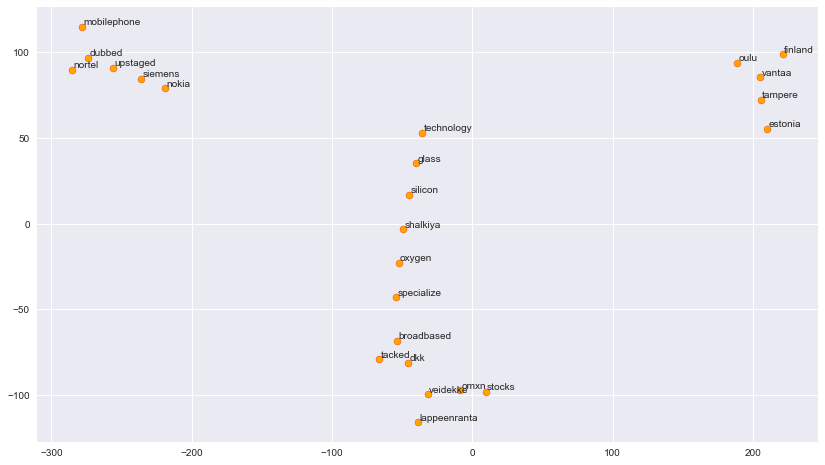

In [388]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Latent semantic analysis

In [389]:

corpus = df1['Financial_Phrases'].tolist()

corpus = [" ".join(tokens) for tokens in corpus]
# Define the number of components for LSA
n_components = 10

# Create a TF-IDF vectorizer to convert the corpus into a sparse matrix of term frequencies
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

# Apply LSA to reduce the dimensionality of the TF-IDF matrix
lsa = TruncatedSVD(n_components)
lsa.fit(tfidf)

lsa_matrix = lsa.transform(tfidf)

# Create a vectorizer object from the LSA model
vectorizer_lsa = make_pipeline(lsa, Normalizer(copy=False))

# Get the singular values of the LSA decomposition
singular_values = lsa.singular_values_

print('Top 10 Singular Values:', singular_values[:10])

Top 10 Singular Values: [9.72284084 6.38527644 5.26195296 4.90030101 4.6896956  4.56434929
 4.18123185 4.08582194 3.76976303 3.72067007]


In [390]:
lsa = TruncatedSVD(n_components=5)
lsa.fit(tfidf)
component_names = ["component_"+str(i+1) for i in range(lsa.n_components)]
components_df = pd.DataFrame(lsa.components_, columns=vectorizer.get_feature_names(), index=component_names)
components_df.head(10)


,00,000,000063,0008,001,002,0025,003,0030,004,...,zgody,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu
component_1,0.002793,0.006844,0.000087,0.000092,0.001109,0.001889,0.000011,0.002300,0.000040,0.003023,...,0.000009,0.000254,0.000060,0.000010,0.000196,0.000053,0.000407,0.000083,0.000087,2.140901e-07
component_2,0.000199,0.017048,0.000845,0.000570,0.000675,0.000237,0.000094,0.000836,0.000283,-0.000592,...,0.000106,0.001604,0.000305,0.000076,0.001825,0.000381,0.002984,0.000614,0.000845,2.090560e-06
component_3,-0.002282,-0.008227,-0.000889,-0.000965,-0.002472,-0.003285,-0.000049,-0.005254,-0.000250,-0.005363,...,-0.000142,-0.001681,-0.000340,-0.000053,0.004506,-0.000260,-0.002057,-0.000392,-0.000889,-2.957089e-06
component_4,-0.003144,0.000592,-0.001297,-0.000898,-0.001032,-0.000333,-0.000118,-0.000802,-0.000409,-0.000105,...,-0.000169,-0.002550,-0.000619,-0.000029,-0.001938,-0.000438,-0.002072,-0.000699,-0.001297,-3.624533e-06
component_5,0.000065,-0.010331,-0.000494,0.000818,0.004905,0.005733,-0.000046,0.010873,-0.000188,0.013790,...,-0.000094,-0.000180,-0.000004,-0.000042,0.003324,-0.000176,0.000545,-0.000155,-0.000494,-3.929511e-06


**LSA doesnt consider the semantic relationship of the text thus we decided to proceed with a pre trained word embedding GloVe**

# LSTM model with GloVe vectors for word embedding

In [391]:
modeldf = df1.copy()


In [392]:
modeldf=modeldf[['Labels', 'Financial_Phrases']]

In [393]:
modeldf

,Labels,Financial_Phrases
0,neutral,"[according, gran, company, plans, move, production, russia, although, company, growing]"
1,neutral,"[technopolis, plans, develop, stages, area, less, 100000, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]"
2,negative,"[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]"
3,positive,"[new, production, plant, company, would, increase, capacity, meet, expected, increase, demand, would, improve, use, raw, materials, therefore, increase, production, profitability]"
4,positive,"[according, company, updated, strategy, years, 20092012, basware, targets, longterm, net, sales, growth, range, 20, 40, operating, profit, margin, 10, 20, net, sales]"
...,...,...
4841,negative,"[london, marketwatch, share, prices, ended, lower, london, monday, rebound, bank, stocks, failed, offset, broader, weakness, ftse, 100]"
4842,neutral,"[rinkuskiai, beer, sales, fell, 65, per, cent, 416, million, litres, kauno, alus, beer, sales, jumped, 69, per, cent, 248, million, litres]"
4843,negative,"[operating, profit, fell, eur, 354, mn, eur, 688, mn, 2007, including, vessel, sales, gain, eur, 123, mn]"
4844,negative,"[net, sales, paper, segment, decreased, eur, 2216, mn, second, quarter, 2009, eur, 2411, mn, second, quarter, 2008, operating, profit, excluding, nonrecurring, items, rose, eur, 80, mn, eur, 76, mn]"


In [394]:
# Get the split indexes because of imbalanced dataset
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(modeldf.Financial_Phrases, modeldf.Labels))

X_train = modeldf.loc[train_idx, 'Financial_Phrases']
y_train = modeldf.loc[train_idx, 'Labels']

X_test = modeldf.loc[test_idx, 'Financial_Phrases']
y_test = modeldf.loc[test_idx, 'Labels']

In [395]:
y_train.value_counts(normalize=True)

neutral     0.594045
positive    0.281250
negative    0.124705
Name: Labels, dtype: float64

In [396]:
y_test.value_counts(normalize=True)

neutral     0.594223
positive    0.281293
negative    0.124484
Name: Labels, dtype: float64

In [397]:
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [398]:
embeddings_index = {}
f = open("C:/Users/ngantayat1/Downloads/glove.42B.300d/glove.42B.300d.txt",encoding="utf8") #upload the glove embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1917495 word vectors.


In [399]:
max_features = 20000
seq_length = 100  
batch_size = 1200

In [400]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [401]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [402]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9125 unique tokens.


In [403]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [404]:
x_train = pad_sequences(sequences_train, maxlen=seq_length)
x_test = pad_sequences(sequences_test, maxlen=seq_length)

In [405]:
word_index

{'eur': 1,
 'company': 2,
 'mn': 3,
 'said': 4,
 'finnish': 5,
 'sales': 6,
 'million': 7,
 'net': 8,
 'profit': 9,
 'finland': 10,
 'group': 11,
 'operating': 12,
 '2009': 13,
 'year': 14,
 '2008': 15,
 'mln': 16,
 'period': 17,
 'new': 18,
 'business': 19,
 '2010': 20,
 'oyj': 21,
 'services': 22,
 'also': 23,
 'quarter': 24,
 'market': 25,
 'share': 26,
 '2007': 27,
 'shares': 28,
 'first': 29,
 '2006': 30,
 'helsinki': 31,
 'euro': 32,
 'today': 33,
 'operations': 34,
 'compared': 35,
 'loss': 36,
 'financial': 37,
 'mobile': 38,
 'corporation': 39,
 'total': 40,
 'products': 41,
 'contract': 42,
 'production': 43,
 'corresponding': 44,
 'technology': 45,
 'nokia': 46,
 'companies': 47,
 'service': 48,
 'bank': 49,
 'solutions': 50,
 'well': 51,
 'per': 52,
 'according': 53,
 'plant': 54,
 'percent': 55,
 'customers': 56,
 'capital': 57,
 'hel': 58,
 'oy': 59,
 'increased': 60,
 'construction': 61,
 '2005': 62,
 'increase': 63,
 'pct': 64,
 'value': 65,
 'rose': 66,
 'investment': 

In [406]:
word_dimension = 300 #dimension of the words from GloVe
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    word_dimension,
                    weights=[embedding_matrix], 
                    input_length=seq_length,
                    trainable=False)) 
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(90, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 300)          2737800   
                                                                 
 lstm_6 (LSTM)               (None, 128)               219648    
                                                                 
 dense_12 (Dense)            (None, 90)                11610     
                                                                 
 dense_13 (Dense)            (None, 3)                 273       
                                                                 
Total params: 2,969,331
Trainable params: 231,531
Non-trainable params: 2,737,800
_________________________________________________________________


In [407]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/5
3/3 [==============================] - 142s 46s/step - loss: 1.0497 - accuracy: 0.4578 - val_loss: 0.9374 - val_accuracy: 0.5922
Epoch 2/5
3/3 [==============================] - 131s 45s/step - loss: 0.9152 - accuracy: 0.5935 - val_loss: 0.9010 - val_accuracy: 0.6025
Epoch 3/5
3/3 [==============================] - 133s 46s/step - loss: 0.8697 - accuracy: 0.6203 - val_loss: 0.8588 - val_accuracy: 0.6286
Epoch 4/5
3/3 [==============================] - 133s 45s/step - loss: 0.8317 - accuracy: 0.6477 - val_loss: 0.8386 - val_accuracy: 0.6272
Epoch 5/5
3/3 [==============================] - 140s 48s/step - loss: 0.8031 - accuracy: 0.6483 - val_loss: 0.8292 - val_accuracy: 0.6307


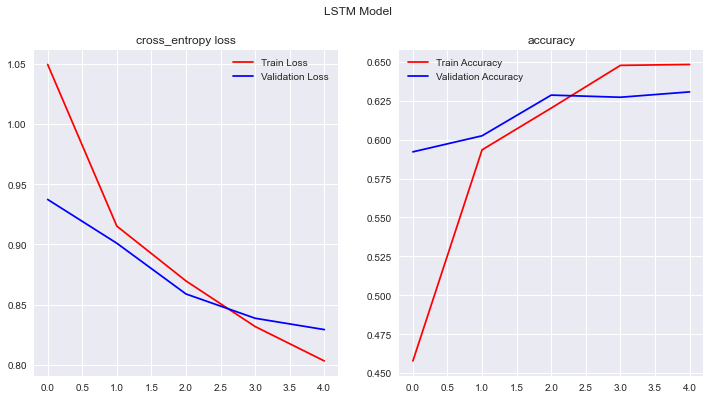

In [408]:
def plot_loss_accuracy(history, title):
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle(title)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history, "LSTM Model")

In [413]:
#incase of error or kernel interruption please re run just the library prompt for the further code block

# User interaction
**add the keywords present for eg:- stock market, price increase/decrease in the stocks df to understand the trends of the market  
explore the nascent df to understand the emerging technologies  
concept ectraction is directed towards a more technical audience for further nlp processing**

# Concept extraction

In [412]:

# Tokenize the documents and create bigrams
documents = df1['Financial_Phrases']
bigram = Phrases(documents, min_count=5, threshold=100)
bigram_phraser = Phraser(bigram)
bigram_documents = bigram_phraser[documents]

# Train a word2vec model
model = Word2Vec(bigram_documents,window=5, min_count=5, workers=4)

# Allow user to input concept and topn
concept = input("Enter a concept: ")
topn = int(input("Enter the number of results to show: "))

# Extract concepts using the model
concepts = model.wv.most_similar(positive=[concept], topn=topn)

# Print the concepts and their similarity scores
print(f"Top {topn} concepts similar to '{concept}':")
for concept, score in concepts:
    print(concept, score)


Enter a concept: nokia
Enter the number of results to show: 5
Top 5 concepts similar to 'nokia':
service 0.9997947812080383
well 0.9997677206993103
mobile 0.9997664093971252
production 0.9997637271881104
new 0.9997382164001465


# Information retrieval through keywords 

# Stock market trends

In [ ]:
pattern = r'\b(stock|price|market|trend|bull|bear|rise|fell|reduced|increased)\b'
financial_phrases = df1['Financial_Phrases'].tolist()
matched_phrases = []
for phrase in financial_phrases:
    phrase_str = " ".join(phrase)
    if re.search(pattern, phrase_str,flags=re.IGNORECASE):
        matched_phrases.append(phrase_str)
        
stocks=pd.DataFrame(matched_phrases)
stocks

In [ ]:
def search_phrases(phrase):
    results = stocks[stocks[0 ].str.contains(phrase)]
    display(results)
    
# Create a text input widget for the search phrase
search_widget = widgets.Text(description='Search:')
display(search_widget)

# Register the search function as a callback for the text input widget
widgets.interact(search_phrases, phrase=search_widget)


# Emerging trends

In [ ]:
pattern = r'\b(new)\b'
financial_phrases = df1['Financial_Phrases'].tolist()
nascent = []
for phrase in financial_phrases:
    phrase_str = " ".join(phrase)
    if re.search(pattern, phrase_str, flags=re.IGNORECASE):
        nascent.append(phrase_str)

nascentdf=pd.DataFrame(nascent)
nascentdf

In [ ]:
def search_phrases(phrase):
    results = nascentdf[nascentdf[0 ].str.contains(phrase)]
    display(results)
    
# Create a text input widget for the search phrase
search_widget = widgets.Text(description='Search:')
display(search_widget)

# Register the search function as a callback for the text input widget
widgets.interact(search_phrases, phrase=search_widget)


# THANK YOU 